In [93]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.8 MB/s eta 0:00:00


In [180]:
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
import torch
import networkx as nx

## Loading pre-trained model (e.g. BERT)

In [181]:
# Load the pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

## Calculating Cosine simmilarity

In [182]:
# Define a function to calculate sentence similarity
def calculate_similarity(sentence1, sentence2):
    # Tokenize the sentences
    inputs = tokenizer.encode_plus(sentence1, sentence2, add_special_tokens=True, return_tensors='pt')

    # Get the token embeddings
    with torch.no_grad():
        outputs = model(**inputs)
        sentence_embeddings = outputs.last_hidden_state

    # Calculate cosine similarity
    embedding1 = sentence_embeddings[0, 0, :]  # Embedding for the first sentence
    embedding2 = sentence_embeddings[0, 1, :]  # Embedding for the second sentence
    similarity = torch.nn.functional.cosine_similarity(embedding1, embedding2, dim=0).item()
    return similarity


## Constructing Graph simmilarity

In [183]:
# Example usage
sentences = [
    "The cat is sitting on the mat.",               ##------|
    "The feline is lounging on the rug.",           #       |-> more simmilar
    "The dogs are in yard.",                        ##------|

    "The student is going to school",               ##------|
    "The doctor is teaching in the university.",    #       |-> more simmilar
    "A lawyer went to the court."                   ##------|
]
threshold = 0.41

In [184]:
# Create a graph
graph = nx.Graph()

In [185]:
 # Add nodes (sentences) to the graph
for i, sentence in enumerate(sentences):
    graph.add_node(i, sentence=sentence)

In [186]:
# Add edges based on similarity above the threshold
num_sentences = len(sentences)
for i in range(num_sentences):
    for j in range(i + 1, num_sentences):
        similarity = calculate_similarity(sentences[i], sentences[j])
        if similarity > threshold:
            graph.add_edge(i, j)

In [187]:
# Print the nodes and edges of the graph
print("Nodes:", graph.nodes(data=True))
print("Edges:", graph.edges())


Nodes: [(0, {'sentence': 'The cat is sitting on the mat.'}), (1, {'sentence': 'The feline is lounging on the rug.'}), (2, {'sentence': 'The dogs are in yard.'}), (3, {'sentence': 'The student is going to school'}), (4, {'sentence': 'The doctor is teaching in the university.'}), (5, {'sentence': 'A lawyer went to the court.'})]
Edges: [(0, 1), (0, 2), (1, 2), (2, 5), (3, 4), (3, 5), (4, 5)]


## plotting the graph

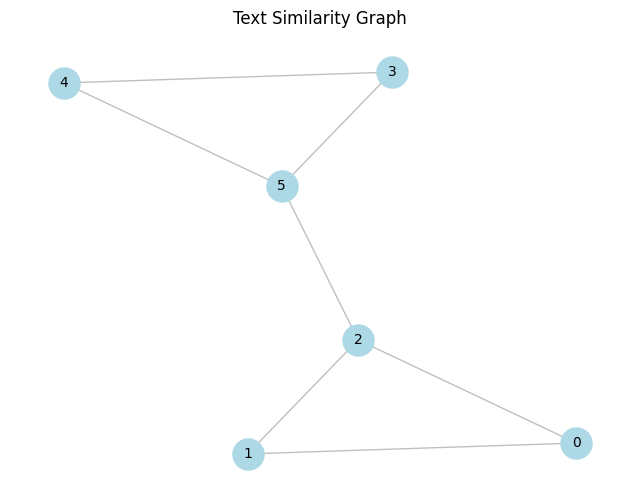

In [188]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph)  # Position the nodes using a spring layout
nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(graph, pos, width=1, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(graph, pos, font_size=10, font_color='black')
plt.title("Text Similarity Graph")
plt.axis('off')
plt.show()



> As we see the sentences 0 , 1 , 2 are connected together as they are more simmilar to each other than 3 , 4 , 5 that is also connected together as they are more simmilar.


